# APS Python
### Mohammed Kaebi e Júlia Seno - Grupo 1

### Tema: Impactos da Gravidez na Adolescência na Vida da Mulher
### Objetivo primario: Identificar quem fica na adolescência e o impacto disso
### Objetivo secundário: Achar um bom modelo de previsão para se uma mulher teve uma gravidez precoce

In [66]:
import pandas as pd
from plotnine import * 
import plotnine as plotnine
from siuba import *
import numpy as np
from lerMicrodados import lerMicrodados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette = "muted", style = "whitegrid")
# pip install statsmodels
# pip install tabulate
import statsmodels.formula.api as smf
import statsmodels.api as sm
from tabulate import tabulate
import patsy
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

Dados em:
https://drive.google.com/file/d/10PdycZHMkXf2GjOBjOZMQXfvBZruSyDn/view?usp=sharing

# Leitura dos dados

## PNAD

In [4]:
# lerMicrodados.ler_PNAD("pnad_2013.zip", ano = 2013, header = True)

In [5]:
pnad = pd.read_csv("PES2013.csv")

In [6]:
pnad.head()

,V0101,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,V0401,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2013,11000015,3,1,4,25,8,1971,42,1,...,1.0,350.0,3.0,2,2.0,NaN,NaN,2.0,350.0,20150428
1,2013,11000015,4,1,4,20,1,1949,64,1,...,2.0,339.0,2.0,1,2.0,NaN,NaN,2.0,339.0,20150428
2,2013,11000015,4,2,4,24,6,2000,13,4,...,2.0,339.0,2.0,2,2.0,NaN,NaN,2.0,339.0,20150428
3,2013,11000015,5,1,2,16,5,1990,23,1,...,3.0,266.0,2.0,1,1.0,2.0,2.0,1.0,266.0,20150428
4,2013,11000015,5,2,4,18,7,1994,19,4,...,3.0,266.0,2.0,5,2.0,NaN,NaN,2.0,266.0,20150428


## PNS

In [7]:
# width = [2,7,7,4,9,2,4,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,1,1,1,1,1,2,2,2,1,2,2,4,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,4,1,5,1,8,1,8,1,3,1,8,1,8,1,3,1,1,1,2,2,1,2,2,1,1,1,8,1,8,1,8,1,8,1,1,2,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,2,1,1,1,1,2,2,1,2,1,1,1,2,1,3,1,1,2,2,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,2,2,2,2,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,4,2,2,4,2,2,4,2,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,2,1,2,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,3,1,1,3,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,2,2,2,1,1,1,2,2,1,2,2,1,2,2,1,1,2,2,1,1,1,1,1,1,1,1,2,1,2,2,1,2,2,1,2,2,1,2,2,1,2,2,1,2,2,1,2,2,1,1,2,2,2,2,2,9,1,2,2,2,2,2,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,2,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,4,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,2,3,3,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,2,2,1,1,1,1,1,2,1,2,1,1,1,2,1,2,1,2,1,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,3,3,3,3,3,3,5,5,14,14,14,14,9,17,3,5,2,2,1,1,1,1,8,8,8]

In [9]:
# pns = pd.read_fwf("PNS_2013.txt", widths = width, header = None, dtype = str)

In [ ]:
# pns.columns = ["V0001","V0024","UPA_PNS","V0006_PNS","UPA","V0015","V0020","V0022","V0026","V0031","V0025","A001","A002","A003","A004","A005","A006","A007","A008","A009","A010","A011","A012","A013","A014","A015","A016","A017","A01801","A01802","A01803","A01804","A01805","A01806","A01807","A01808","A01809","A01810","A01811","A01812","A01813","A01814","A01815","A01816","A01817","A01818","A019","A020","A021","A022","A02301","A02302","A02303","A02304","A024","B001","B002","B003","B004","C001","C00301","C004","C006","C00701","C00702","C00703","C008","C009","C010","C011","C012","D001","D002","D003","D004","D005","D006","D007","D008","D009","D010","D011","D012","D013","D014","D015","E001","E002","E003","E004","E005","E006","E007","E008","E01001","E01002","E01003","E011","E01201","E014","E01501","E01601","E01602","E01603","E01604","E01605","E017","E01801","E01802","E01803","E01804","E01805","E019","E020","E021","E022","E023","E024","E025","E02501","E02502","E026","E027","F001","F00102","F007","F00702","F008","F00802","VDF001","VDF00102","G001","G002","G00201","G003","G004","G005","G006","G007","G00701","G008","G009","G010","G014","G015","G01501","G016","G017","G018","G021","G022","G02201","G023","G024","G02501","G02502","G02503","G026","G027","G032","I001","I002","I003","I004","I005","I006","I007","I00701","I008","I009","I010","I011","J001","J002","J003","J004","J005","J006","J007","J008","J009","J010","J011","J012","J013","J014","J015","J016","J017","J018","J019","J020","J021","J022","J023","J024","J025","J026","J027","J029","J030","J031","J032","J033","J034","J035","J036","J037","J038","J039","J04001","J04002","J041","J042","J043","J044","J045","J046","J047","J048","J049","J050","J051","J052","J053","J054","J055","J056","J057","J058","J059","J060","K001","K002","K003","K004","K005","K006","K007","K008","K009","K010","K011","K012","K013","K014","K015","K016","K017","K018","K019","K020","K021","K022","K023","K024","K025","K026","K027","K028","K029","K030","K031","K032","K033","K034","K035","K036","K039","K040","K041","K042","K043","K044","K045","K046","K047","K048","K049","K050","K051","K052","K053","K054","k055","K056","K057","K058","K059","K06001","K06002","K06003","K06101","K06102","K062","L00201","L00202","L00203","L003","L004","L005","L006","L007","L008","L009","L010","L011","L012","L013","L014","L015","L01613","L01614","L01615","L01616","L01617","L01618","L01619","L01620","L01621","L01622","L01623","L01624","L01701","L01702","L01703","L01704","L01705","L01706","L01707","L01708","L01709","L01710","L01711","L01712","L01713","L01714","L01715","L01716","L018","L019","L020","M001","M002","M003","M005","M006","M007","M008","M009","M010","M01101","M01102","M01103","M01104","M01105","M01106","M01107","M01108","M01301","M01302","M01303","M014","M015","M016","M017","M018","M019","N001","N002","N003","N004","N005","N006","N007","N008","N010","N011","N012","N013","N014","N015","N016","N017","N018","N019","N020","N021","N022","N023","O001","O002","O003","O004","O005","O006","O007","O008","O009","O00901","O010","O011","O012","O013","O014","O015","O016","O017","O01801","O01802","O019","O020","O021","O02101","O022","O023","O024","O025","O027","O028","O029","O030","O031","O032","O033","O034","O035","O036","O037","O038","O039","O040","O041","O042","O043","O044","O045","O046","O047","O048","P001","P00101","P002","P003","P00301","P004","P00401","P005","P006","P007","P008","P009","P010","P011","P012","P013","P014","P015","P016","P017","P018","P019","P020","P021","P022","P023","P024","P025","P026","P02601","P027","P028","P029","P030","P031","P032","P033","P034","P035","P036","P03701","P03702","P038","P039","P03901","P03902","P03903","P040","P04101","P04102","P042","P04301","P04302","P044","P04401","P04403","P04404","P045","P046","P047","P048","P049","P050","P051","P052","P053","P05401","P05402","P05403","P05404","P05405","P05406","P05407","P05408","P05409","P05410","P05411","P05412","P05413","P05414","P05415","P05416","P05417","P05418","P05419","P05421","P05422","P055","P056","P05601","P05602","P05603","P05604","P05605","P057","P058","P05801","P05802","P05901","P05902","P05903","P05904","P060","P061","P062","P063","P064","P065","P066","P067","P068","P069","P07001","P07002","P07003","P071","P072","Q001","Q002","Q003","Q004","Q005","Q006","Q007","Q008","Q009","Q010","Q011","Q012","Q013","Q014","Q015","Q016","Q017","Q01801","Q01802","Q01803","Q01804","Q01805","Q01806","Q01807","Q01808","Q01901","Q01902","Q01903","Q01904","Q01905","Q020","Q021","Q022","Q023","Q024","Q026","Q027","Q028","Q029","Q030","Q031","Q032","Q033","Q03401","Q03402","Q035","Q036","Q037","Q038","Q039","Q040","Q041","Q042","Q043","Q044","Q045","Q04601","Q04602","Q04603","Q04604","Q04605","Q04606","Q04607","Q04608","Q04609","Q04701","Q04702","Q04703","Q04704","Q04705","Q048","Q049","Q050","Q051","Q052","Q053","Q054","Q05501","Q05502","Q05503","Q05504","Q05505","Q05506","Q05507","Q05508","Q05509","Q056","Q057","Q058","Q059","Q060","Q061","Q06201","Q06202","Q06203","Q06204","Q06205","Q06206","Q063","Q06301","Q06302","Q06303","Q06304","Q064","Q06501","Q06502","Q06503","Q06504","Q066","Q067","Q068","Q069","Q070","Q071","Q07201","Q07202","Q07203","Q07204","Q07205","Q07206","Q073","Q074","Q075","Q076","Q07701","Q07702","Q078","Q079","Q080","Q08101","Q08102","Q08103","Q08104","Q08105","Q082","Q083","Q084","Q085","Q08601","Q08603","Q08604","Q08605","Q087","Q088","Q089","Q09001","Q09003","Q09004","Q09005","Q091","Q092","Q093","Q094","Q095","Q09601","Q09602","Q09603","Q097","Q098","Q100","Q101","Q102","Q103","Q104","Q105","Q106","Q107","Q108","Q109","Q110","Q11001","Q11002","Q11003","Q11004","Q111","Q112","Q113","Q11401","Q11402","Q11403","Q115","Q116","Q11601","Q11602","Q11603","Q117","Q11801","Q11802","Q11803","Q11804","Q119","Q120","Q121","Q122","Q123","Q124","Q125","Q12601","Q12602","Q12603","Q12604","Q12605","Q127","Q128","Q130","Q131","Q132","Q133","Q134","Q135","Q136","Q137","R001","R002","R003","R004","R005","R006","R007","R008","R009","R010","R011","R012","R013","R014","R015","R016","R017","R018","R019","R020","R021","R022","R023","R024","R025","R026","R027","R028","R029","R030","R031","R032","R033","R034","R035","R03601","R03602","R03603","R03604","R03605","R03606","R03607","R03608","R03609","R03610","R03611","R037","R038","R039","R040","R041","R04101","R042","R04201","R043","R044","R045","R046","R047","R048","R04901","R04902","R04903","S001","S002","S003","S004","S005","S006","S007","S008","S009","S01001","S01002","S01003","S01004","S01005","S01101","S01102","S01103","S012","S013","S01401","S01402","S01403","S01404","S01405","S015","S016","S017","S018","S019","S020","S021","S022","S023","S024","S025","S026","S027","S028","S029","S030","S031","S032","S033","S034","S035","S036","S037","S038","S039","S040","S041","S042","S043","S044","S045","S046","S047","S048","S049","S050","S051","S052","S053","S054","S055","S056","S057","S058","U001","U00201","U00202","U00203","U004","U005","U006","U009","U010","U011","U014","U015","U01701","U01702","U01801","U01802","U019","U020","U021","U022","U023","U02301","U024","U02401","U025","X001","X002","X003","X004","X005","X006","X007","X008","X011","X012","X01401","X01402","X01501","X01502","X016","X017","X018","X019","X02001","X02002","X02003","X02004","X02005","X02006","X02201","X02202","X02203","X02204","X02205","X02206","X024","X02501","X02502","X02503","X02504","X02505","X02506","X02507","X02508","X02509","X02510","W00101","W00102","W00103","W00201","W00202","W00203","W00301","W00302","W00303","W00401","W00402","W00403","W00404","W00405","W00406","W00407","W00408","V0028","V0029","V00281","V00291","V00282","V00292","V00283","V00293","VDC001","VDC002","VDD004","VDD004A","VDE001","VDE002","VDF002","VDF003","VDDATA"]

In [ ]:
# pns.head()

In [12]:
# pns.to_csv("PNS_2013.csv")

In [14]:
pns = pd.read_csv("PNS_2013.csv", dtype = str)
pns.head()

,Unnamed: 0,V0001,V0024,UPA_PNS,V0006_PNS,UPA,V0015,V0020,V0022,V0026,...,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDE002,VDF002,VDF003,VDDATA
0,0,11,1110011,1100002,0001,110021877,01,2013,04,1,...,11112,04,02,2,2,1,1,00000840,00000210,20200715
1,1,11,1110011,1100002,0001,110021877,01,2013,04,1,...,NaN,04,02,5,5,2,NaN,00000840,00000210,20200715
2,2,11,1110011,1100002,0001,110021877,01,2013,04,1,...,NaN,04,02,NaN,.,NaN,NaN,00000840,00000210,20200715
3,3,11,1110011,1100002,0001,110021877,01,2013,04,1,...,NaN,04,02,4,4,2,NaN,00000840,00000210,20200715
4,4,11,1110011,1100002,0002,110021877,01,2013,02,1,...,11113,02,02,2,2,1,1,00001000,00000500,20200715


## Parte 1

## Pesquisa Nacional de Saúde (PNS)
### Selecionando as variáveis necessárias para análise

In [15]:
pnsl = (pns >>
    select("V0001", "V0026", "C001", "C004", "C006", "C008", "C009", "C010", "C011", "D001", "O027", "O028", "O029", "O038", "R032", "R033", "R034", "R035", "R03603", "R03604", "R039", "R040", "R045", "VDD004A", "VDE001", "VDE002", "VDF003") >>
    rename(UF = "V0001", 
           rural = "V0026", 
           pessDom = "C001", 
           condDom = "C004", 
           sexo = "C006", 
           idade = "C008", 
           cor = "C009", 
           viveConjuge = "C010", 
           estadoCivil = "C011", 
           sabeLer = "D001", 
           tipoViolencia = "O027", 
           objetoViolencia = "O028", 
           ondeViolencia = "O029", 
           freqViolencia = "O038", 
           planFam = "R032",
           parceiroPlan = "R033",
           metodoCont = "R034",
           motivoNgravi = "R035",
           camMasc = "R03603",
           camFem = "R03604",
           ficouGravida = "R039",
           idadePrimeiraGravidez = "R040",
           filhosNasc = "R045",
           nivelEduc = "VDD004A",
           PEA = "VDE001", 
           ocupado = "VDE002",
           rendFamCapita = "VDF003"))

As variáveis foram selecionadas de acordo com a relevância para o objetivo do trabalho. Essas variáveis selecionadas foram:
1. As mais gerais: os estados, se mora em área rural ou urbana, quantas pessoas tem no domicílio, quem é a pessoa na família (pai, mãe, filho), sexo, idade, cor ou raça, se vive com o cônjuge, estado civil, se é alfabetizado, qual nível educacional, se é economicamente ativo, se é ocupado e a renda familiar per capita.
2. Sobre violência: Se sofreu violência, qual tipo (para casos de violência doméstica), qual objeto foi utilizado na violência, onde ocorreu e a frequência.
3. Sobre planejamento familiar: se participou de um grupo de planejamento familiar, se o parceiro participou, se usa método contraceptivo (segmentado em camisinha), qual o motivo de não evitar gravidez.
4. Sobre gravidez: já ficou grávida, idade que teve o primeiro filho, quantos filhos nascidos vivos tem.


In [16]:
pnsl.head(10)

,UF,rural,pessDom,condDom,sexo,idade,cor,viveConjuge,estadoCivil,sabeLer,...,motivoNgravi,camMasc,camFem,ficouGravida,idadePrimeiraGravidez,filhosNasc,nivelEduc,PEA,ocupado,rendFamCapita
0,11,1,04,01,1,035,2,1,1,2,...,NaN,NaN,NaN,NaN,.,.,2,1,1,00000210
1,11,1,04,02,2,037,1,1,1,1,...,NaN,NaN,NaN,NaN,.,.,5,2,NaN,00000210
2,11,1,04,04,2,000,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,.,.,.,NaN,NaN,00000210
3,11,1,04,06,2,016,1,2,5,1,...,NaN,NaN,NaN,NaN,.,.,4,2,NaN,00000210
4,11,1,02,01,1,042,4,1,1,1,...,NaN,NaN,NaN,NaN,.,.,2,1,1,00000500
5,11,1,02,02,2,038,1,1,1,1,...,NaN,NaN,NaN,NaN,.,.,2,2,NaN,00000500
6,11,1,.,NaN,NaN,.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,.,.,.,NaN,NaN,.
7,11,1,03,01,2,032,2,1,5,1,...,1,NaN,NaN,1,31,01,5,2,NaN,00001393
8,11,1,03,02,1,046,4,1,5,1,...,NaN,NaN,NaN,NaN,.,.,5,1,1,00001393
9,11,1,03,04,1,001,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,.,.,.,NaN,NaN,00001393


#### Todas as variáveis foram exportadas como strings para que a importação dos microdados ocorresse corretamente
#### Com isso, temos que transformar as variáveis que vamos usar em seus tipos ideais para que os gráficos rodem

## Variáveis categóricas

In [17]:
# tranformando as variáveis em categóricas
pnsl["sexo"] = pd.Series(pnsl["sexo"], dtype = "category")
pnsl["cor"] = pd.Series(pnsl["cor"], dtype = "category")
pnsl["rural"] = pd.Series(pnsl["rural"], dtype = "category")
pnsl["sabeLer"] = pd.Series(pnsl["sabeLer"], dtype = "category")
pnsl["ocupado"] = pd.Series(pnsl["ocupado"], dtype = "category")

In [18]:
# Ajustando as categorias para que tenham nomes em vez de números
pnsl["sexo"] = pnsl["sexo"].cat.rename_categories({'1': "Homem", '2': "Mulher"})
pnsl["cor"] = pnsl["cor"].cat.rename_categories({'1': "Branco", '2': "Preto", "3": "Amarelo", "4": "Pardo", "5": "Indígena", "9": "Não respondeu"})
pnsl["rural"] = pnsl["rural"].cat.rename_categories({'1': "Urbano", '2': "Rural"})
pnsl["sabeLer"] = pnsl["sabeLer"].cat.rename_categories({'1': "Sim", '2': "Não"})
pnsl["ocupado"] = pnsl["ocupado"].cat.rename_categories({'1': "Sim", '2': "Não"})

In [19]:
pnsl = pnsl[pnsl.cor != 'Não respondeu']
pnsl['cor'] = pnsl['cor'].cat.remove_unused_categories()

In [20]:
# Criando dummy para a variável cor quando "Branco"
dum = pd.get_dummies(pnsl["cor"])
pnsl = pd.concat([pnsl, dum], axis = 1)

In [21]:
# Ajustando a variável branco 
pnsl["Branco"] = pd.Series(pnsl["Branco"], dtype = "string")

In [22]:
# Transformando a variável em categórica com duas categorias
pnsl["Branco"] = pd.Series(pnsl["Branco"], dtype = "category")
pnsl["Branco"] = pnsl["Branco"].cat.rename_categories({'1': "Branco", '0': "Não branco"})

In [23]:
pnsl["UF"] = pd.Series(pnsl["UF"], dtype = "category")
pnsl["UF"] = pnsl["UF"].cat.rename_categories({'11': "RO", '12': "AC",
                                                    '13': "AM", '14': "RR",
                                                    '15': "PA", '16': "AP",
                                                    '17': "TO", '21': "MA",
                                                    '22': "PI", '23': "CE",
                                                    '24': "RN", '25': "PB",
                                                    '26': "PE", '27': "AL",
                                                    '28': "SE", '29': "BA",
                                                    '31': "MG", '32': "ES",
                                                    '33': "RJ",'35': "SP",
                                                    '41': "PR",'42': "SC",
                                                    '43': "RS",'50': "MS",
                                                    '51': "MT",'52': "GO",
                                                    '53': "DF"})

In [24]:
pnsl["nivelEduc"] = pd.Series(pnsl["nivelEduc"], dtype = "category")

In [25]:
pnsl["nivelEduc"] = pnsl["nivelEduc"].cat.rename_categories({'1': "Sem Instrução", '2': "Fundamental incompleto", 
                                                             "3": "Fundamental completo", "4": "Médio Incompleto", 
                                                             "5": "Médio completo", "6": "Superior Incompleto", 
                                                             "7": "Superior completo", '.': "NaN"})

In [26]:
pnsl["nivelEduc"]

0         Fundamental incompleto
1                 Médio completo
2                            NaN
3               Médio Incompleto
4         Fundamental incompleto
                   ...          
222380      Fundamental completo
222381       Superior Incompleto
222382            Médio completo
222383    Fundamental incompleto
222384    Fundamental incompleto
Name: nivelEduc, Length: 205541, dtype: category
Categories (8, object): ['NaN', 'Sem Instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio Incompleto', 'Médio completo', 'Superior Incompleto', 'Superior completo']

In [27]:
pnsl = pnsl[pnsl.nivelEduc != 'NaN']
pnsl['nivelEduc'] = pnsl['nivelEduc'].cat.remove_unused_categories()

## Variáveis numéricas

In [28]:
# com a opção de errors = 'coerce' os dados que estavam como "." se tornam "NaN"
pnsl["idade"] = pd.to_numeric(pnsl["idade"], downcast = 'float', errors = 'coerce')
pnsl["idadePrimeiraGravidez"] = pd.to_numeric(pnsl["idadePrimeiraGravidez"], downcast = 'float', errors = 'coerce') 
pnsl["rendFamCapita"] = pd.to_numeric(pnsl["rendFamCapita"], downcast = 'float', errors = 'coerce')

In [49]:
# pnsl["logrenda"] = np.log(pnsl["rendFamCapita"])

In [30]:
pnsl["GravPrec"] = (pnsl["idadePrimeiraGravidez"] <= 19) * 1

In [31]:
pnsl["GravPrec"]

0         0
1         0
3         0
4         0
5         0
         ..
222380    0
222381    1
222382    0
222383    0
222384    0
Name: GravPrec, Length: 191092, dtype: int64

In [32]:
pnsl["idadePrimeiraGravidez"]

0          NaN
1          NaN
3          NaN
4          NaN
5          NaN
          ... 
222380     NaN
222381    17.0
222382     NaN
222383     NaN
222384     NaN
Name: idadePrimeiraGravidez, Length: 191092, dtype: float32

## Pesquisa Nacional por Amostra de Domicílios (PNAD)
### Selecionando as variáveis necessárias para análise

In [33]:
pnadl = (pnad >>
    select("V0102", "V4728","V0302", "V8005", "V0401", "V0404", "V4011", "V4111", "V0601", "V4742", "V4814", "V4803", "V4805", "V4704", "V4746") >>
    rename(UF_arrumar = "V0102",
           sexo = "V0302", 
           rural = "V4728",
           idade = "V8005", 
           condDom = "V0401", 
           cor = "V0404", 
           estadoCivil = "V4011", 
           viveConjuge = "V4111", 
           sabeLer = "V0601", 
           rendFamCapita = "V4742", 
           anoEduc = "V4803",
           ocupado = "V4805",
           PEA = "V4704",
           posicaoOcup = "V4746"))

As variáveis foram selecionadas de acordo com a relevância para o objetivo do trabalho. Essas variáveis selecionadas foram:
- Os estados, se mora em área rural ou urbana, quem é a pessoa na família (pai, mãe, filho), sexo, idade, cor ou raça, se vive com o cônjuge, estado civil, se é alfabetizado, anos de estudo, se é economicamente ativo, se é ocupado, a renda familiar per capita e o tipo de ocupação.

In [34]:
pnadl.head()

,UF_arrumar,rural,sexo,idade,condDom,cor,estadoCivil,viveConjuge,sabeLer,rendFamCapita,V4814,anoEduc,ocupado,PEA,posicaoOcup
0,11000015,1,4,42,1,2,5.0,3.0,1,350.0,NaN,6,NaN,2.0,2.0
1,11000015,1,4,64,1,8,7.0,3.0,3,339.0,NaN,1,NaN,2.0,2.0
2,11000015,1,4,13,4,4,0.0,5.0,1,339.0,NaN,6,NaN,2.0,2.0
3,11000015,1,2,23,1,8,0.0,5.0,1,266.0,1.0,1,1.0,1.0,1.0
4,11000015,1,4,19,4,8,0.0,5.0,1,266.0,NaN,12,NaN,2.0,2.0


In [35]:
# tranformando as variáveis em categóricas
pnadl["sexo"] = pd.Series(pnadl["sexo"], dtype = "category")

In [36]:
pnadl["sexo"]

0         4
1         4
2         4
3         2
4         4
         ..
362550    2
362551    2
362552    2
362553    4
362554    4
Name: sexo, Length: 362555, dtype: category
Categories (2, int64): [2, 4]

In [37]:
# Ajustando as categorias para que tenham nomes em vez de números
pnadl["sexo"] = pnadl["sexo"].cat.rename_categories({2: "Homem", 4: "Mulher"})

In [38]:
pnadl["sexo"]

0         Mulher
1         Mulher
2         Mulher
3          Homem
4         Mulher
           ...  
362550     Homem
362551     Homem
362552     Homem
362553    Mulher
362554    Mulher
Name: sexo, Length: 362555, dtype: category
Categories (2, object): ['Homem', 'Mulher']

In [39]:
pnadl["UF_arrumar"] = pd.Series(pnadl["UF_arrumar"], dtype = "string")

In [40]:
pnadl["UF_arrumar"]

0         11000015
1         11000015
2         11000015
3         11000015
4         11000015
            ...   
362550    53002148
362551    53002148
362552    53002148
362553    53002148
362554    53002148
Name: UF_arrumar, Length: 362555, dtype: string

In [41]:
pnadl["UF"] = pnadl["UF_arrumar"].str[:2] # arrumando a variavel UF_arrumar

In [42]:
pnadl["UF"] = pd.Series(pnadl["UF"], dtype = "category")
pnadl["UF"] = pnadl["UF"].cat.rename_categories({'11': "RO", '12': "AC",
                                                    '13': "AM", '14': "RR",
                                                    '15': "PA", '16': "AP",
                                                    '17': "TO", '21': "MA",
                                                    '22': "PI", '23': "CE",
                                                    '24': "RN", '25': "PB",
                                                    '26': "PE", '27': "AL",
                                                    '28': "SE", '29': "BA",
                                                    '31': "MG", '32': "ES",
                                                    '33': "RJ",'35': "SP",
                                                    '41': "PR",'42': "SC",
                                                    '43': "RS",'50': "MS",
                                                    '51': "MT",'52': "GO",
                                                    '53': "DF"})

In [43]:
pnadl["cor"] = pd.Series(pnadl["cor"], dtype = "string")
pnadl["cor"] = pd.Series(pnadl["cor"], dtype = "category")

In [44]:
pnadl["cor"]

0         2
1         8
2         4
3         8
4         8
         ..
362550    4
362551    2
362552    8
362553    8
362554    8
Name: cor, Length: 362555, dtype: category
Categories (6, object): ['0', '2', '4', '6', '8', '9']

In [45]:
pnadl["cor"] = pnadl["cor"].cat.rename_categories({'2': "Branco", '4': "Preto", "6": "Amarelo", "8": "Pardo", "0": "Indígena", "9": "Não respondeu"})

In [46]:
pnadl = pnadl[pnadl.cor != 'Não respondeu']
pnadl['cor'] = pnadl['cor'].cat.remove_unused_categories()

In [47]:
# Criando dummy para a variável cor quando "Branco"
dumm = pd.get_dummies(pnadl["cor"])
pnadl = pd.concat([pnadl, dumm], axis = 1)

In [48]:
# Ajustando a variável branco 
pnadl["Branco"] = pd.Series(pnadl["Branco"], dtype = "string")
# Transformando a variável em categórica com duas categorias
pnadl["Branco"] = pd.Series(pnadl["Branco"], dtype = "category")
pnadl["Branco"] = pnadl["Branco"].cat.rename_categories({'1': "Branco", '0': "Não branco"})

### Perguntas:

1. Sobre as bases de dados: elas são compatíveis (ex.: tem a mesma distribuição de indivíduos por idade e sexo)?

2. Sobre a Pesquisa Nacional de Saúde: \
    2.1 Como é a distribuição de idade por sexo e cor? \
    2.2 Qual a relação entre idade da primeira gravidez e renda per capita? \
    2.3 Como é a distribuição da variável idade da primeira gravidez? 
      - Essa distribuição muda entre diferentes unidades da federação? 
      - Essa distribuição muda entre diferentes níveis educacionais?                
      
      
3. O que pode explicar a gravidez precoce?

4. O que pode prever a gravidez precoce?
    
5. Sobre a PNAD: 
    - Como é a distribuição de idade por sexo e cor?   

## Tabelas
### Descritivas

In [ ]:
pnsl["idade"].describe()

In [41]:
pnadl["idade"].describe()

count    362555.000000
mean         33.049813
std          20.870874
min           0.000000
25%          16.000000
50%          31.000000
75%          48.000000
max         109.000000
Name: idade, dtype: float64

In [42]:
pnsl["idadePrimeiraGravidez"].describe()

count    16811.000000
mean        20.778538
std          5.239564
min          0.000000
25%         17.000000
50%         20.000000
75%         24.000000
max         45.000000
Name: idadePrimeiraGravidez, dtype: float64

### Gráficos

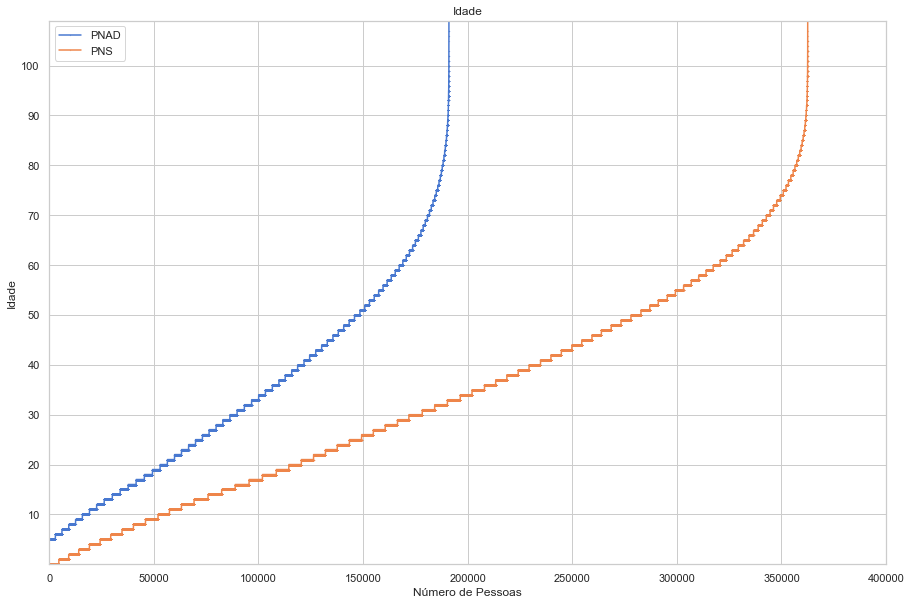

In [50]:
fig, ax = plt.subplots(figsize = (15,10))

ax.set_title("Idade")
ax.plot(np.sort(pnsl["idade"]), marker = "o", markersize = 0.2, label = "PNAD")
ax.plot(np.sort(pnadl["idade"]), marker = "o", markersize = 0.2, label = "PNS")
ax.set_xlabel("Número de Pessoas")
ax.set_ylabel("Idade")
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.legend(loc='upper left')
ax.set_ylim(0, 109)
ax.set_xlim(0,400000);

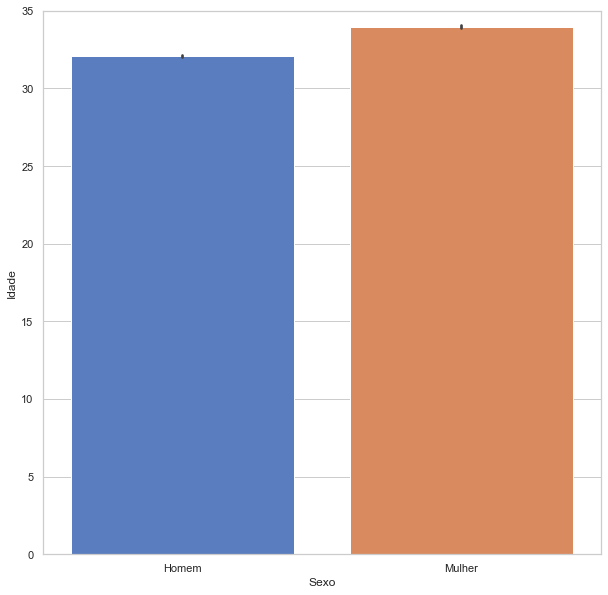

In [55]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = "sexo", y = "idade", data = pnadl)
ax.set_xlabel("Sexo")
ax.set_ylabel("Idade")
ax.set_ylim(0, 35);

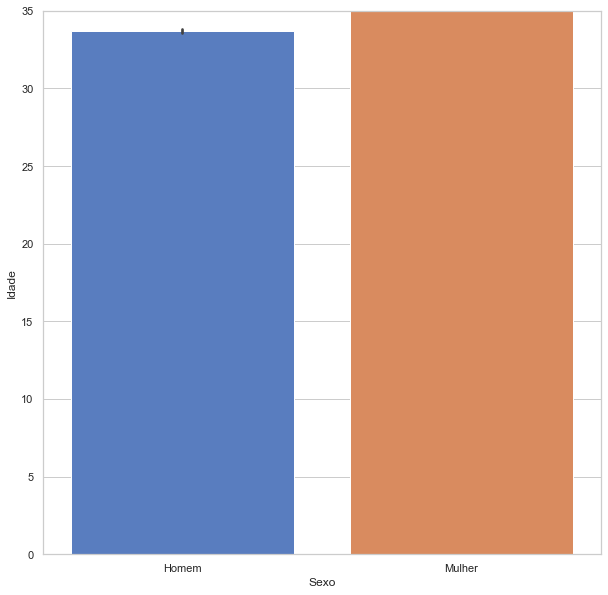

In [56]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = "sexo", y = "idade", data = pnsl)
ax.set_xlabel("Sexo")
ax.set_ylabel("Idade")
ax.set_ylim(0, 35);

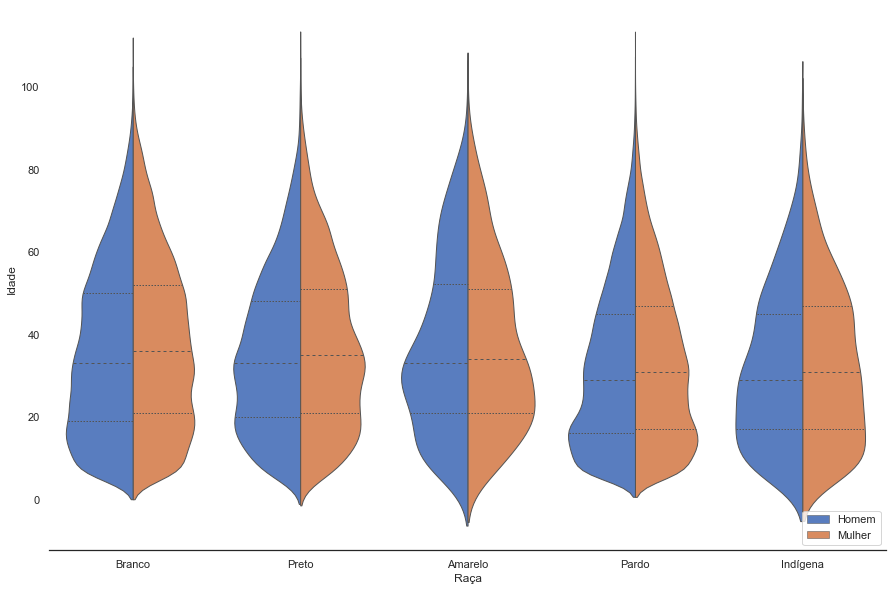

In [480]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.violinplot(data=pnsl, x="cor", y="idade", hue="sexo",
               split=True, inner="quart", linewidth=1)
ax.set(xlabel = "Raça", ylabel = "Idade")
ax.legend(loc='lower right');
ax = sns.despine(left=True)

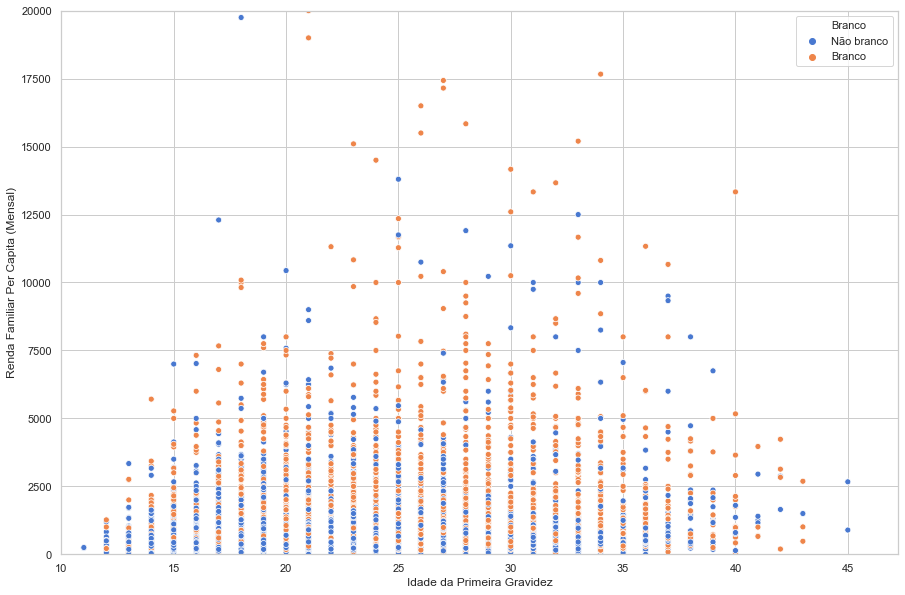

In [63]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.scatterplot(x="idadePrimeiraGravidez", y="rendFamCapita",
                hue="Branco",
                data = pnsl)
ax.set(xlabel = "Idade da Primeira Gravidez", ylabel = "Renda Familiar Per Capita (Mensal)")
ax.set_ylim(0, 20000)
ax.set_xlim(10, );

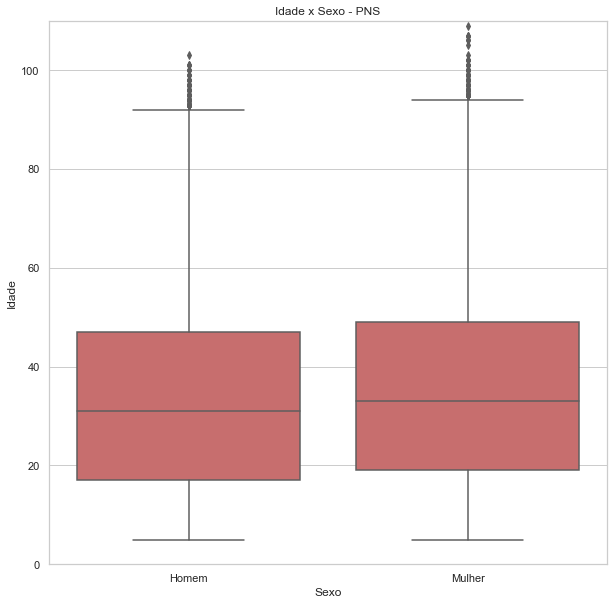

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
sns.color_palette("pastel")

ax = sns.boxplot(x="sexo", y="idade", palette=["r"], # hue="cor",
            data = pnsl)
ax.set(xlabel = "Sexo", ylabel = "Idade", title = "Idade x Sexo - PNS")
ax.set_ylim(0, 110);

# ax.legend(loc='upper center')

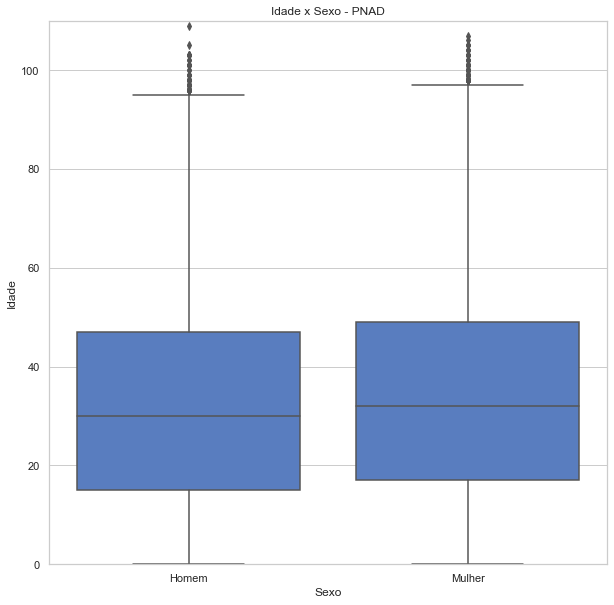

In [79]:
fig, ax = plt.subplots(figsize = (10,10))

(sns.boxplot(x="sexo", y="idade", palette=["b"], data = pnadl)
    .set(xlabel = "Sexo", ylabel = "Idade", title = "Idade x Sexo - PNAD"))
ax.set_ylim(0, 110);

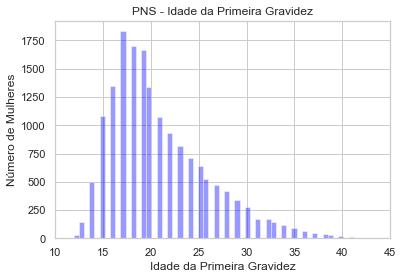

In [80]:
(sns.distplot(pnsl["idadePrimeiraGravidez"], kde = False, bins = "fd", color = "blue")
             .set(xlabel = "Idade da Primeira Gravidez", ylabel = "Número de Mulheres", title = "PNS - Idade da Primeira Gravidez", xlim = (10, 45)));

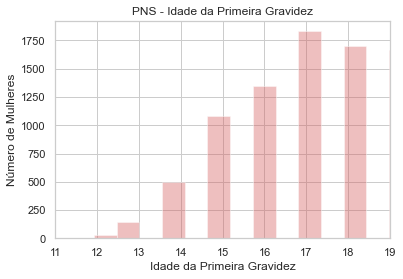

In [81]:
(sns.distplot(pnsl["idadePrimeiraGravidez"], kde = False, bins = "fd", color = "r")
             .set(xlabel = "Idade da Primeira Gravidez", ylabel = "Número de Mulheres", title = "PNS - Idade da Primeira Gravidez", xlim = (11, 19)));

In [1]:
from plotnine import ggplot

In [4]:
theme_set(theme_classic())
ggplot(pnsl) + aes(x="sexo") + geom_bar()

NameError: name 'pnsl' is not defined

/Users/juliaseno/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 174281 rows containing non-finite values.
/Users/juliaseno/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_count : Removed 174281 rows containing non-finite values.


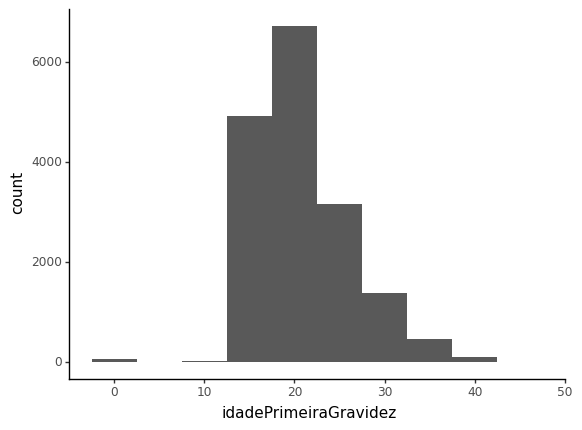

<ggplot: (8768444307719)>

In [84]:
theme_set(theme_classic())
ggplot(pnsl) + aes(x="idadePrimeiraGravidez") + stat_bin(bins=10) + geom_bar()

In [116]:
theme_set(theme_classic())
plotnine.options.figure_size = (15,15)

(
    ggplot(pnsl)
  + aes(x="factor(idadePrimeiraGravidez)", y="rendFamCapita", fill = "Branco")
  + geom_boxplot(alpha = 0.5)
  + coord_flip()
  + scale_y_log10()
  + xlab('Idade da Primeira Gravidez')
  + ylab('Log da Renda Familiar Per Capita (Mensal)')
)

KeyboardInterrupt: 

/Users/juliaseno/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 174281 rows containing non-finite values.


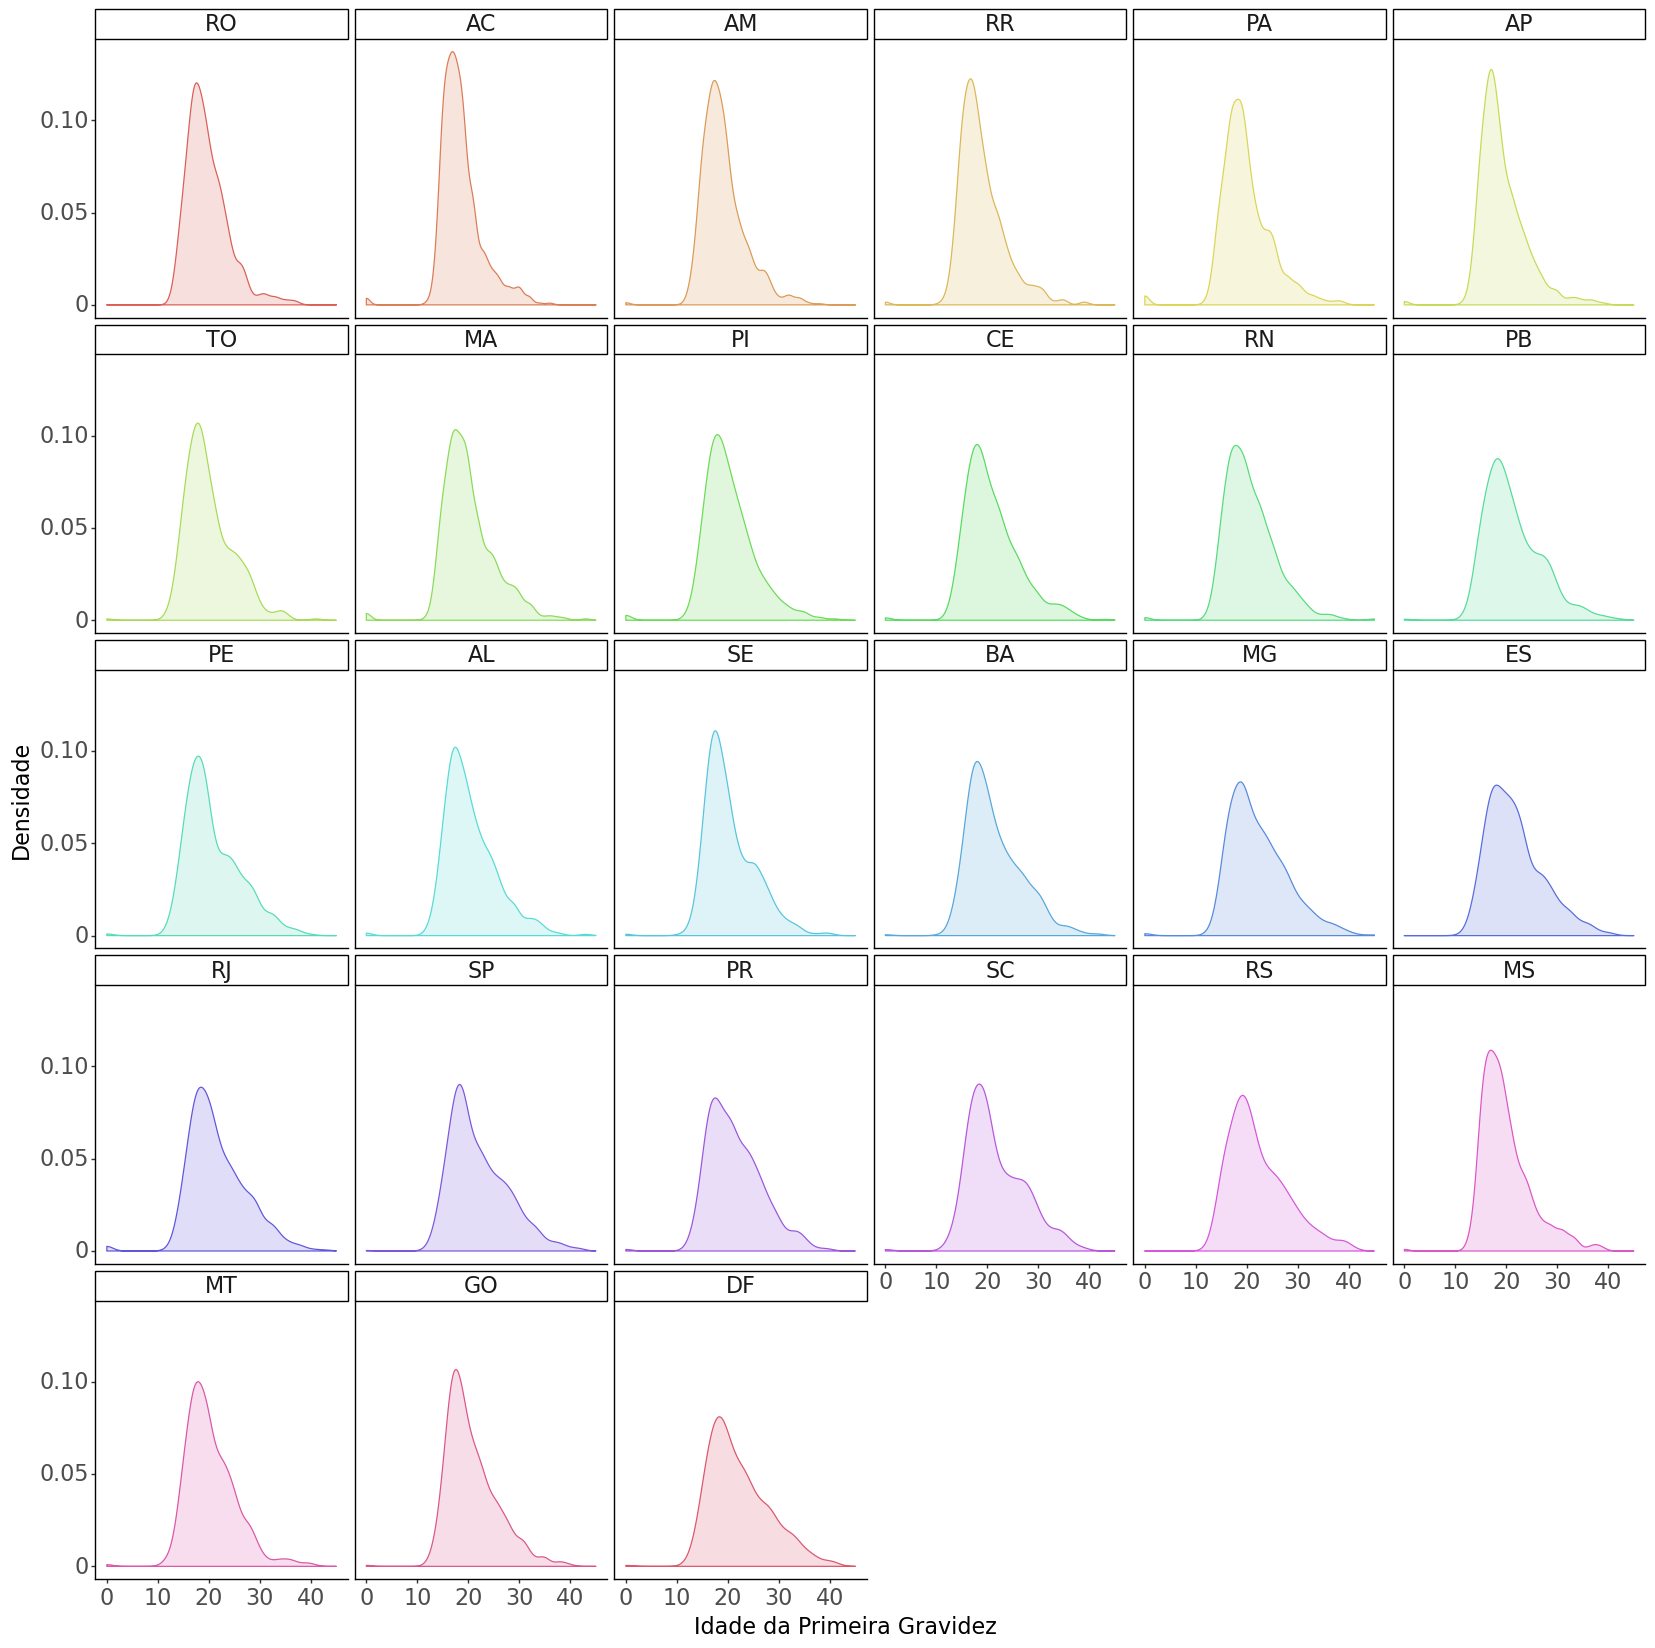

<ggplot: (8778652736877)>

In [139]:
theme_set(theme_classic())

(
    ggplot(pnsl, aes(x='idadePrimeiraGravidez', color='UF', fill='UF'))
    + geom_density(alpha=0.2)
    + facet_wrap('UF')
    + theme(legend_position = "none", figure_size = (20,20), text=element_text(size=16))
    + labs(x = "Idade da Primeira Gravidez", y = "Densidade")
)

/Users/juliaseno/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 174281 rows containing non-finite values.


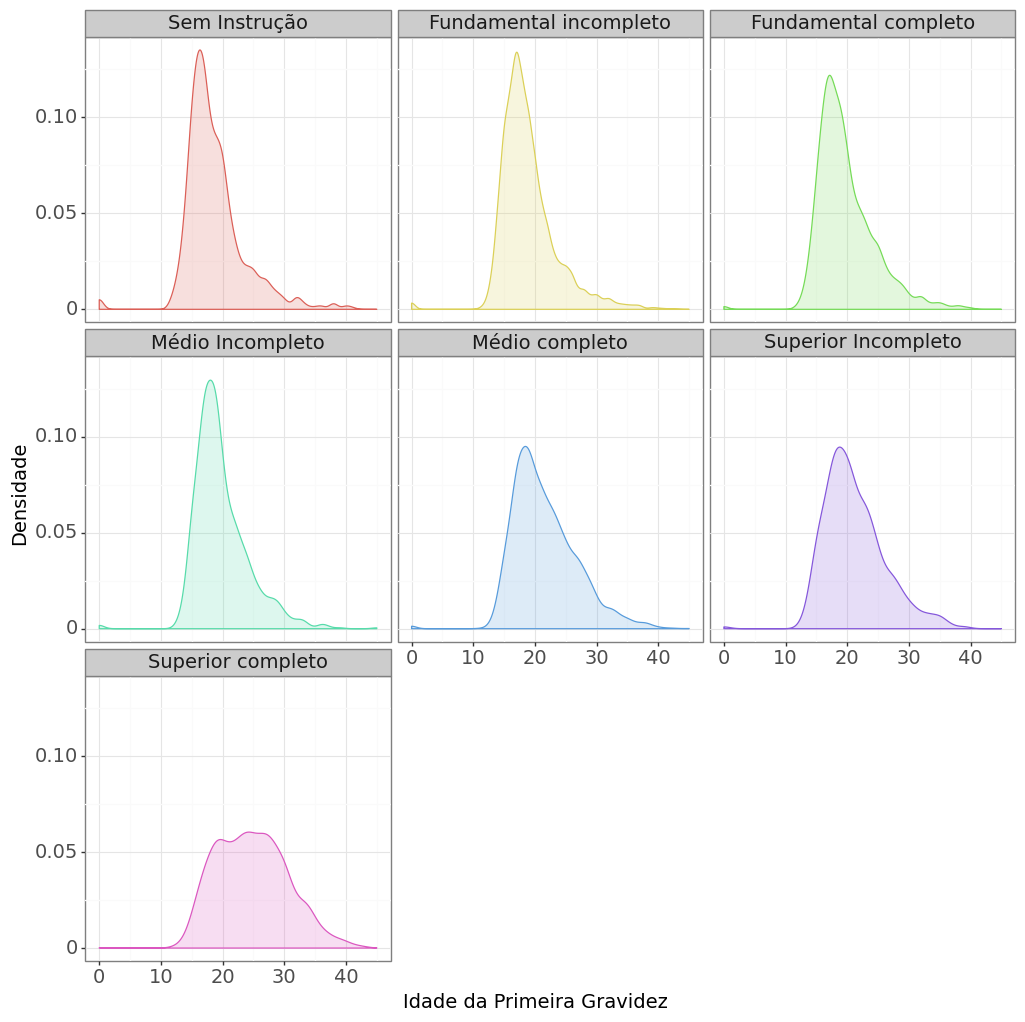

<ggplot: (8778662300805)>

In [462]:
(
    ggplot(pnsl, aes(x='idadePrimeiraGravidez', color='nivelEduc', fill='nivelEduc'))
    + geom_density(alpha=0.2)
    + facet_wrap('nivelEduc')
    + theme(legend_position = "none", figure_size = (12,12), text=element_text(size=14))
    + labs(x = "Idade da Primeira Gravidez", y = "Densidade")
    #+ facet_grid(". ~ nivelEduc") 
)

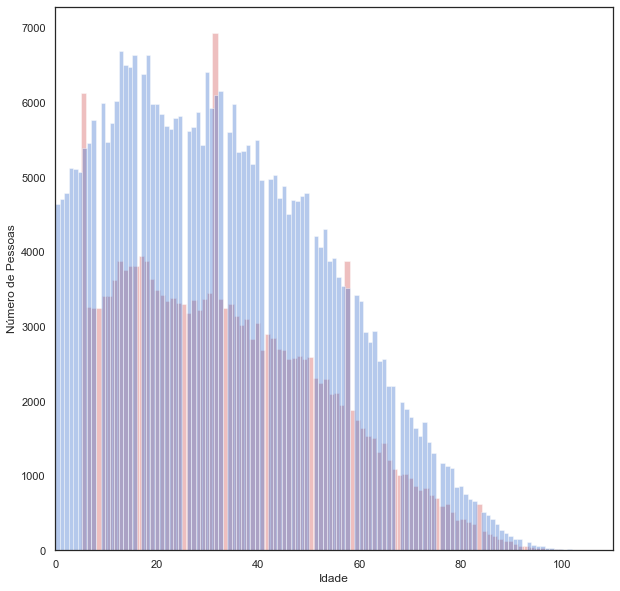

In [94]:
fig, p1 = plt.subplots(figsize = (10,10))
sns.set_style("white")
p1 = sns.distplot(pnsl["idade"], kde = False, bins = "fd", color = "r", label = "Idade na PNS")
p1 = sns.distplot(pnadl["idade"],kde = False, bins = "fd", color = "b", label = "Idade na PNAD")
p1.set(xlabel = "Idade", ylabel = "Número de Pessoas", xlim = (0, 110));

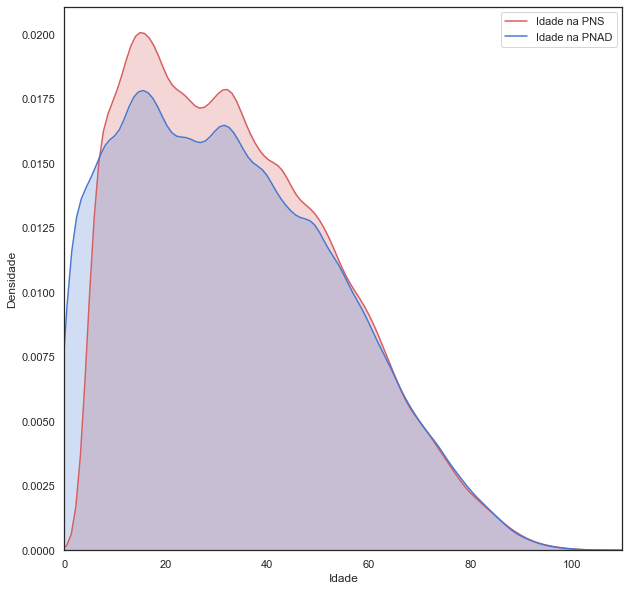

In [95]:
fig, p1 = plt.subplots(figsize = (10,10))

sns.set_style("white")
p1=sns.kdeplot(pnsl['idade'], shade=True, color="r", label = "Idade na PNS")
p1=sns.kdeplot(pnadl['idade'], shade=True, color="b", label = "Idade na PNAD")
p1.set(xlabel = "Idade", ylabel = "Densidade", xlim = (0, 110));

In [96]:
total = (pnsl['idadePrimeiraGravidez']>=0).mean()
menores = (pnsl['idadePrimeiraGravidez']<=19).mean()/(pnsl['idadePrimeiraGravidez']>=0).mean()
print(menores)

0.49705549937540905


In [97]:
total = (pnsl['idade']).median()
print(total)
menores1 = (pnsl['idade']<=4).mean()/(pnsl['idade']>=0).mean()
menores2 = (pnadl['idade']<=4).mean()/(pnadl['idade']>=0).mean()
print(menores1)
print(menores2)

32.0
0.0
0.06720359669567376


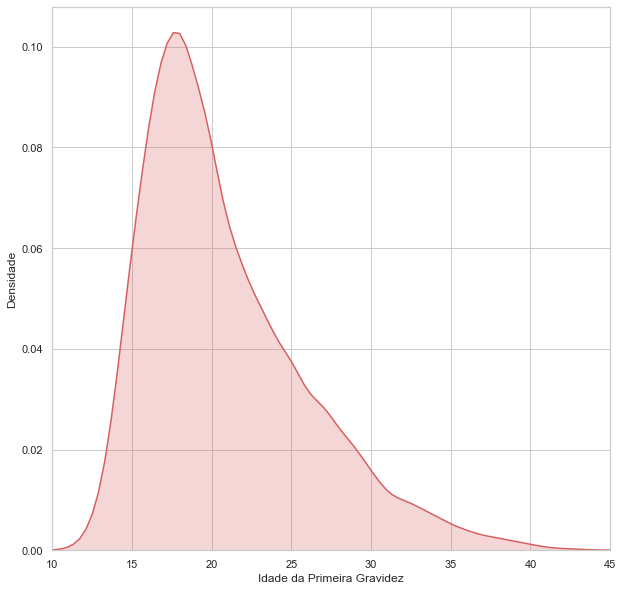

In [461]:
fig, p1 = plt.subplots(figsize = (10,10))

sns.set_style("white")
p1=sns.kdeplot(pnsl['idadePrimeiraGravidez'], shade=True, color="r", label = "")
p1.set(xlabel = "Idade da Primeira Gravidez", ylabel = "Densidade", xlim = (10, 45));

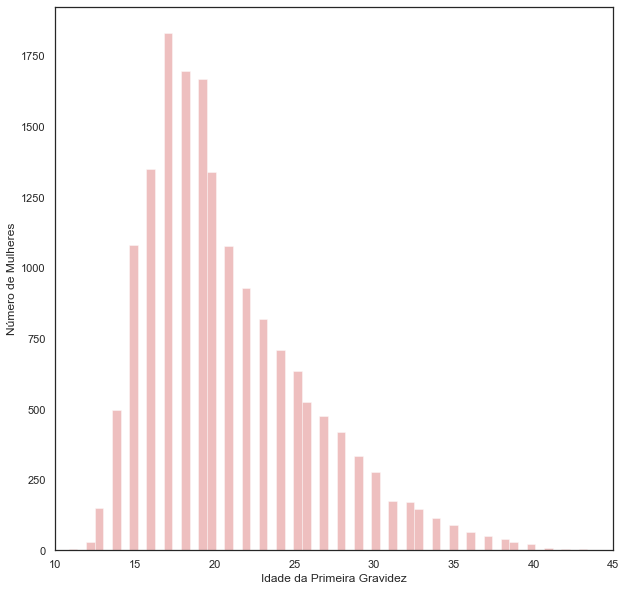

In [99]:
fig, p1 = plt.subplots(figsize = (10,10))
sns.set_style("white")
p1 = sns.distplot(pnsl["idadePrimeiraGravidez"], kde = False, bins = "fd", color = "r")
p1.set(xlabel = "Idade da Primeira Gravidez", ylabel = "Número de Mulheres", xlim = (10, 45)); #title = "PNS - Idade da Primeira Gravidez",

In [56]:
probit = smf.probit("GravPrec ~ ocupado + idade + rendFamCapita + UF + sabeLer + cor + nivelEduc", data = pnsl).fit()

Optimization terminated successfully.
         Current function value: 0.193492
         Iterations 25


In [57]:
probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               GravPrec   No. Observations:                98044
Model:                         Probit   Df Residuals:                    98003
Method:                           MLE   Df Model:                           40
Date:                Mon, 16 Nov 2020   Pseudo R-squ.:                 0.03359
Time:                        21:50:23   Log-Likelihood:                -18971.
converged:                       True   LL-Null:                       -19630.
Covariance Type:            nonrobust   LLR p-value:                1.302e-250
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.2552      0.061    -20.552      0.000      -1.375      -1.136
ocupado[T.Não]                          0.0955      0.026      3.660      0.000       0.044       0.147
UF[T.AC]                                0.1636      0.053      3.116      0.002       0.061       0.267
UF[T.AM]                               -0.0560      0.050     -1.123      0.262      -0.154       0.042
UF[T.RR]                                0.1189      0.053      2.248      0.025       0.015       0.222
UF[T.PA]                               -0.1692      0.053     -3.217      0.001      -0.272      -0.066
UF[T.AP]                               -0.0023      0.056     -0.041      0.968      -0.112       0.107
UF[T.TO]                                0.0640      0.056      1.137      0.256      -0.046       0.174
UF[T.MA]                               -0.0424      0.055     -0.774      0.439      -0.150       0.065
UF[T.PI]                               -0.0891      0.057     -1.575      0.115      -0.200       0.022
UF[T.CE]                               -0.1385      0.052     -2.671      0.008      -0.240      -0.037
UF[T.RN]                               -0.0720      0.057     -1.265      0.206      -0.184       0.040
UF[T.PB]                               -0.1274      0.058     -2.195      0.028      -0.241      -0.014
UF[T.PE]                               -0.0389      0.052     -0.753      0.451      -0.140       0.062
UF[T.AL]                               -0.1179      0.058     -2.032      0.042      -0.232      -0.004
UF[T.SE]                               -0.0542      0.057     -0.952      0.341      -0.166       0.057
UF[T.BA]                               -0.1584      0.053     -3.015      0.003      -0.261      -0.055
UF[T.MG]                               -0.1557      0.050     -3.134      0.002      -0.253      -0.058
UF[T.ES]                               -0.1175      0.059     -1.989      0.047      -0.233      -0.002
UF[T.RJ]                               -0.1497      0.052     -2.883      0.004      -0.251      -0.048
UF[T.SP]                               -0.0729      0.047     -1.564      0.118      -0.164       0.018
UF[T.PR]                               -0.0276      0.051     -0.540      0.589      -0.128       0.072
UF[T.SC]                               -0.0030      0.059     -0.050      0.960      -0.119       0.113
UF[T.RS]                               -0.0349      0.053     -0.654      0.513      -0.140       0.070
UF[T.MS]                                0.0762      0.054      1.419      0.156      -0.029       0.181
UF[T.MT]                               -0.0642      0.060     -1.076      0.282      -0.181       0.053
UF[T.GO]                               -0.0067      0.052     -0.129      0.897      -0.108       0.094
UF[T.DF]                                0.0276      0.056      0.488      0.625      -0.083       0.138
sabeLer[T.Não]   

In [58]:
probit = smf.probit("GravPrec ~ ocupado + idade + rendFamCapita + UF + sabeLer + C(cor, levels = ['Pardo', 'Branco', 'Preto', 'Amarelo', 'Indígena']) + nivelEduc", data = pnsl).fit()

Optimization terminated successfully.
         Current function value: 0.193492
         Iterations 25


In [59]:
probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               GravPrec   No. Observations:                98044
Model:                         Probit   Df Residuals:                    98003
Method:                           MLE   Df Model:                           40
Date:                Mon, 16 Nov 2020   Pseudo R-squ.:                 0.03359
Time:                        21:51:20   Log-Likelihood:                -18971.
converged:                       True   LL-Null:                       -19630.
Covariance Type:            nonrobust   LLR p-value:                1.302e-250
==================================================================================================================================================
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                         -1.1613      0.059    -19.553      0.000      -1.278      -1.045
ocupado[T.Não]                                                                     0.0955      0.026      3.660      0.000       0.044       0.147
UF[T.AC]                                                                           0.1636      0.053      3.116      0.002       0.061       0.267
UF[T.AM]                                                                          -0.0560      0.050     -1.123      0.262      -0.154       0.042
UF[T.RR]                                                                           0.1189      0.053      2.248      0.025       0.015       0.222
UF[T.PA]                                                                          -0.1692      0.053     -3.217      0.001      -0.272      -0.066
UF[T.AP]                                                                          -0.0023      0.056     -0.041      0.968      -0.112       0.107
UF[T.TO]                                                                           0.0640      0.056      1.137      0.256      -0.046       0.174
UF[T.MA]                                                                          -0.0424      0.055     -0.774      0.439      -0.150       0.065
UF[T.PI]                                                                          -0.0891      0.057     -1.575      0.115      -0.200       0.022
UF[T.CE]                                                                          -0.1385      0.052     -2.671      0.008      -0.240      -0.037
UF[T.RN]                                                                          -0.0720      0.057     -1.265      0.206      -0.184       0.040
UF[T.PB]                                                                          -0.1274      0.058     -2.195      0.028      -0.241      -0.014
UF[T.PE]                                                                          -0.0389      0.052     -0.753      0.451      -0.140       0.062
UF[T.AL]                                                                          -0.1179      0.058     -2.032      0.042      -0.232      -0.004
UF[T.SE]                                                                          -0.0542      0.057     -0.952      0.341      -0.166       0.057
UF[T.BA]                                                                          -0.1584      0.053     -3.015      0.003      -0.261      -0.055
UF[T.MG]                                                                          -0.1557      0.050     -3.134      0.002      -0.253      -0.058
UF[T.ES]                                                                          -0.1175      0.059     -1.989      0.047      -0.233      -0.002
UF[T.RJ

In [60]:
logit = smf.logit("GravPrec ~ ocupado + idade + rendFamCapita + UF + sabeLer + C(cor, levels = ['Pardo', 'Branco', 'Preto', 'Amarelo', 'Indígena']) + nivelEduc", data = pnsl).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.193427
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               GravPrec   No. Observations:                98044
Model:                          Logit   Df Residuals:                    98003
Method:                           MLE   Df Model:                           40
Date:                Mon, 16 Nov 2020   Pseudo R-squ.:                 0.03391
Time:                        21:52:15   Log-Likelihood:                -18964.
converged:                       True   LL-Null:                       -19630.
Covariance Type:            nonrobust   LLR p-value:                2.823e-253
==================================================================================================================================================
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                         -1.9547      0.126    -15.527      0.000      -2.201      -1.708
ocupado[T.Não]                                                                     0.1901      0.053      3.561      0.000       0.085       0.295
UF[T.AC]                                                                           0.3193      0.108      2.958      0.003       0.108       0.531
UF[T.AM]                                                                          -0.1338      0.105     -1.272      0.203      -0.340       0.072
UF[T.RR]                                                                           0.2283      0.109      2.090      0.037       0.014       0.442
UF[T.PA]                                                                          -0.3680      0.112     -3.278      0.001      -0.588      -0.148
UF[T.AP]                                                                          -0.0144      0.117     -0.123      0.902      -0.244       0.215
UF[T.TO]                                                                           0.1227      0.117      1.046      0.295      -0.107       0.353
UF[T.MA]                                                                          -0.0941      0.115     -0.818      0.414      -0.320       0.131
UF[T.PI]                                                                          -0.2004      0.120     -1.673      0.094      -0.435       0.034
UF[T.CE]                                                                          -0.3054      0.110     -2.766      0.006      -0.522      -0.089
UF[T.RN]                                                                          -0.1558      0.120     -1.294      0.196      -0.392       0.080
UF[T.PB]                                                                          -0.2807      0.124     -2.258      0.024      -0.524      -0.037
UF[T.PE]                                                                          -0.0863      0.109     -0.794      0.427      -0.299       0.127
UF[T.AL]                                                                          -0.2589      0.123     -2.101      0.036      -0.500      -0.017
UF[T.SE]                                                                          -0.1237      0.120     -1.033      0.301      -0.358       0.111
UF[T.BA]                                                                          -0.3413      0.112     -3.046      0.002      -0.561      -0.122
UF[T.MG]                                                                          -0.3326      0.106     -3.127      0.002      -0.541      -0.124
UF[T.ES]                                                                          -0.2467      0.127     -1.945      0.052      -0.495       0.002
UF[T.RJ

In [62]:
# pnsl["logrenda"] = np.log(pnsl["rendFamCapita"])

In [63]:
# pnsl["logrenda"]

In [64]:
pnsl["idade2"] = np.log(pnsl["idade"]**2)

In [65]:
mdl_logit_fit = smf.glm("GravPrec ~ 1 + ocupado + idade + idade2 + rendFamCapita + UF + sabeLer + cor + nivelEduc", data = pnsl, 
              family = sm.families.Binomial(link = sm.genmod.families.links.logit())).fit()
print(mdl_logit_fit.summary().tables[1])

                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -37.8833      0.970    -39.041      0.000     -39.785     -35.981
ocupado[T.Não]                          0.4872      0.054      8.957      0.000       0.381       0.594
UF[T.AC]                                0.3855      0.110      3.518      0.000       0.171       0.600
UF[T.AM]                               -0.0856      0.106     -0.804      0.421      -0.294       0.123
UF[T.RR]                                0.2977      0.111      2.689      0.007       0.081       0.515
UF[T.PA]                               -0.3719      0.113     -3.278      0.001      -0.594      -0.150
UF[T.AP]                                0.0594      0.118      0.502      0.616      -0.173       0.291
UF[T.TO]                                0.1687      0.119      1

In [67]:
pnsm = pnsl[pnsl.sexo == "Mulher"]

In [68]:
pnsm = pnsm[pnsm.idadePrimeiraGravidez > 0]

In [69]:
pnsm.isna().sum() # vamos tirar ocupado!

UF                           0
rural                        0
pessDom                      0
condDom                      0
sexo                         0
idade                        0
cor                          0
viveConjuge                  0
estadoCivil                  0
sabeLer                      0
tipoViolencia            16193
objetoViolencia          16193
ondeViolencia            16193
freqViolencia            16006
planFam                   2952
parceiroPlan             16106
metodoCont                2952
motivoNgravi             10574
camMasc                   9133
camFem                    9133
ficouGravida                 0
idadePrimeiraGravidez        0
filhosNasc                   0
nivelEduc                    0
PEA                          0
ocupado                   6170
rendFamCapita                1
Branco                       0
Preto                        0
Amarelo                      0
Pardo                        0
Indígena                     0
logrenda

In [70]:
training, test = train_test_split(pnsm, test_size = 0.3, random_state = 42)

In [71]:
(pnsm["GravPrec"])

7         0
10        1
17        0
48        1
83        0
         ..
222353    0
222365    1
222372    1
222376    0
222381    1
Name: GravPrec, Length: 16755, dtype: int64

In [74]:
probit_treino = smf.probit("GravPrec ~  idade + idade2 + rendFamCapita + UF + cor + nivelEduc", data = training).fit()

Optimization terminated successfully.
         Current function value: 0.606712
         Iterations 6


In [75]:
print(probit_treino.summary().tables[1])

                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              11.1721      1.030     10.851      0.000       9.154      13.190
UF[T.AC]                                0.3671      0.094      3.892      0.000       0.182       0.552
UF[T.AM]                                0.2069      0.088      2.343      0.019       0.034       0.380
UF[T.RR]                                0.3071      0.095      3.233      0.001       0.121       0.493
UF[T.PA]                               -0.1083      0.092     -1.182      0.237      -0.288       0.071
UF[T.AP]                                0.1812      0.100      1.808      0.071      -0.015       0.378
UF[T.TO]                                0.0339      0.099      0.343      0.732      -0.160       0.228
UF[T.MA]                               -0.1106      0.093     -1

In [76]:
prob = probit_treino.predict(test)
# prob = pd.to_numeric(prob, downcast = 'float', errors = 'coerce')

In [77]:
print(prob)
np.mean(prob)

159279    0.538609
54563     0.380619
79018     0.825416
154698    0.040008
222286    0.552805
            ...   
193857    0.792939
147773    0.649199
66621     0.360170
212820    0.548379
203577    0.334582
Length: 5027, dtype: float64


0.4978954505121438

In [80]:
y_hat_probit = np.where(prob >= 0.4, 1, 0)

In [81]:
np.mean(y_hat_probit)

0.6685896160732047

In [82]:
C = confusion_matrix(test["GravPrec"], y_hat_probit) # Observed x Predicted
print(C, "\n")

accuracy = (C[0, 0] + C[1, 1]) / C.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = C[1, 1] / (C[1, 0] + C[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = 1 - (C[0, 1] / (C[0, 0] + C[0, 1]))
print(f"Specificity: {specificity:.4f}")

[[1214 1338]
 [ 452 2023]] 

Accuracy:    0.6439
Sensitivity: 0.8174
Specificity: 0.4757


In [83]:
# prob = np.nan_to_num(prob)

In [84]:
fpr_rlog, tpr_rlog, threshold_rlog = roc_curve(test["GravPrec"], prob)

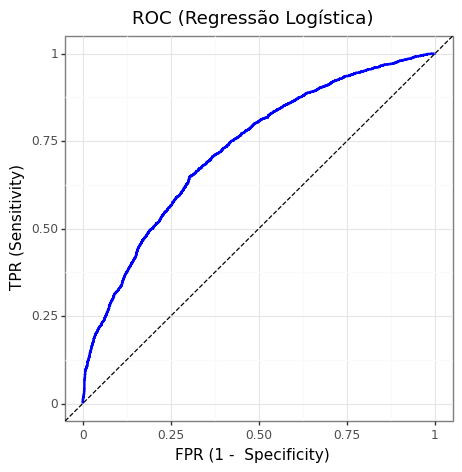

<ggplot: (8776059046220)>

In [86]:
theme_set(theme_bw())

plotnine.options.figure_size = (5, 5)

(ggplot() +
    geom_line(aes(x = fpr_rlog, y = tpr_rlog), color = "blue", size = 1) +
    geom_abline(linetype = "dashed") +
    labs(x = "FPR (1 -  Specificity)", y = "TPR (Sensitivity)", title = "ROC (Regressão Logística)"))

In [87]:
auc_rlog = roc_auc_score(test["GravPrec"], prob)
print(auc_rlog)

0.7270396757544093


In [88]:
print(fpr_rlog)

[0.         0.         0.         ... 0.99137931 1.         1.        ]


In [96]:
best = threshold_rlog[np.argmax(0.6 * tpr_rlog + 0.4 * (1 - fpr_rlog))] # valorizamos mais a sensibilidade ou a true positive rate
print(best, "\n")

0.42116900056370804 



In [97]:
y_hat_rlog = np.where(prob >= best, 1, 0)

C = confusion_matrix(test["GravPrec"], y_hat_rlog) # Observed x Predicted
print(C, "\n")

accuracy = (C[0, 0] + C[1, 1]) / C.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = C[1, 1] / (C[1, 0] + C[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = 1 - (C[0, 1] / (C[0, 0] + C[0, 1]))
print(f"Specificity: {specificity:.4f}")

[[1311 1241]
 [ 497 1978]] 

Accuracy:    0.6543
Sensitivity: 0.7992
Specificity: 0.5137


In [111]:
y, X = patsy.dmatrices("GravPrec ~ 0 + idade + idade2 + rendFamCapita + UF + cor + nivelEduc", pnsm)

(X_trn, X_tst, y_trn, y_tst) = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [112]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

rf.fit(X_trn, np.ravel(y_trn))

y_hat_rf = rf.predict(X_tst)

C = confusion_matrix(np.ravel(y_tst), np.ravel(y_hat_rf))
print(C, "\n")

accuracy = (C[0, 0] + C[1, 1]) / C.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = C[1, 1] / (C[1, 0] + C[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = 1 - (C[0, 1] / (C[0, 0] + C[0, 1]))
print(f"Specificity: {specificity:.4f}")

[[2670 1538]
 [1617 2552]] 

Accuracy:    0.6234
Sensitivity: 0.6121
Specificity: 0.6345


In [113]:
prob_rf = rf.predict_proba(X_tst)[:, 1]
prob_rf = np.nan_to_num(prob_rf)

In [114]:
prob_rf

array([0.33 , 0.804, 0.498, ..., 0.18 , 0.678, 0.17 ])

In [115]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_tst, prob_rf)

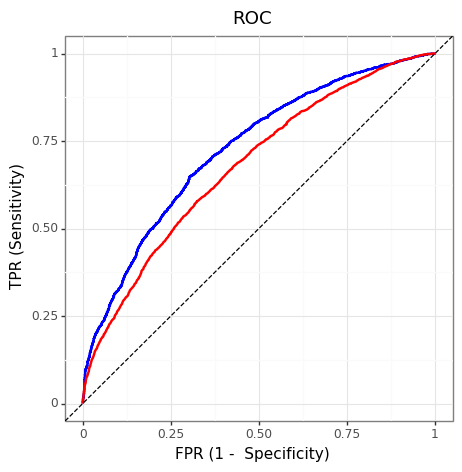

<ggplot: (8776059072531)>

In [134]:
(ggplot() +
     geom_line(aes(x = fpr_rlog, y = tpr_rlog), color = "blue", size = 1)   +
     geom_line(aes(x = fpr_rf, y = tpr_rf), color = "red", size = 1) +
    geom_abline(linetype = "dashed") +
    labs(x = "FPR (1 -  Specificity)", y = "TPR (Sensitivity)", title = "ROC")
)
# como colocar legenda para qual modelo tem cada curva?

In [135]:
auc_rf = roc_auc_score(y_tst, prob_rf)
print(auc_rf)

0.6782869748834189


In [136]:
X.design_info.column_names

['UF[RO]',
 'UF[AC]',
 'UF[AM]',
 'UF[RR]',
 'UF[PA]',
 'UF[AP]',
 'UF[TO]',
 'UF[MA]',
 'UF[PI]',
 'UF[CE]',
 'UF[RN]',
 'UF[PB]',
 'UF[PE]',
 'UF[AL]',
 'UF[SE]',
 'UF[BA]',
 'UF[MG]',
 'UF[ES]',
 'UF[RJ]',
 'UF[SP]',
 'UF[PR]',
 'UF[SC]',
 'UF[RS]',
 'UF[MS]',
 'UF[MT]',
 'UF[GO]',
 'UF[DF]',
 'cor[T.Preto]',
 'cor[T.Amarelo]',
 'cor[T.Pardo]',
 'cor[T.Indígena]',
 'nivelEduc[T.Fundamental incompleto]',
 'nivelEduc[T.Fundamental completo]',
 'nivelEduc[T.Médio Incompleto]',
 'nivelEduc[T.Médio completo]',
 'nivelEduc[T.Superior Incompleto]',
 'nivelEduc[T.Superior completo]',
 'idade',
 'idade2',
 'rendFamCapita']

In [137]:
rf.feature_importances_

array([0.00937078, 0.00982488, 0.01030848, 0.00933839, 0.00940277,
       0.00824559, 0.00941069, 0.01019392, 0.00852744, 0.01080363,
       0.00866468, 0.00883528, 0.01056593, 0.00854616, 0.00791618,
       0.00983723, 0.01068225, 0.00795219, 0.01123198, 0.01367807,
       0.01068033, 0.00651039, 0.00856529, 0.00804874, 0.00712197,
       0.01045984, 0.0081221 , 0.01428525, 0.00435507, 0.02750816,
       0.00345434, 0.0279541 , 0.01110964, 0.0085367 , 0.02098806,
       0.00798725, 0.0263789 , 0.13849708, 0.13765258, 0.31844768])

In [138]:
Var_imp = pd.DataFrame(dict(variable = X.design_info.column_names, importance = rf.feature_importances_))

In [142]:
print(Var_imp)

                               variable  importance
0                                UF[RO]    0.009371
1                                UF[AC]    0.009825
2                                UF[AM]    0.010308
3                                UF[RR]    0.009338
4                                UF[PA]    0.009403
5                                UF[AP]    0.008246
6                                UF[TO]    0.009411
7                                UF[MA]    0.010194
8                                UF[PI]    0.008527
9                                UF[CE]    0.010804
10                               UF[RN]    0.008665
11                               UF[PB]    0.008835
12                               UF[PE]    0.010566
13                               UF[AL]    0.008546
14                               UF[SE]    0.007916
15                               UF[BA]    0.009837
16                               UF[MG]    0.010682
17                               UF[ES]    0.007952
18          

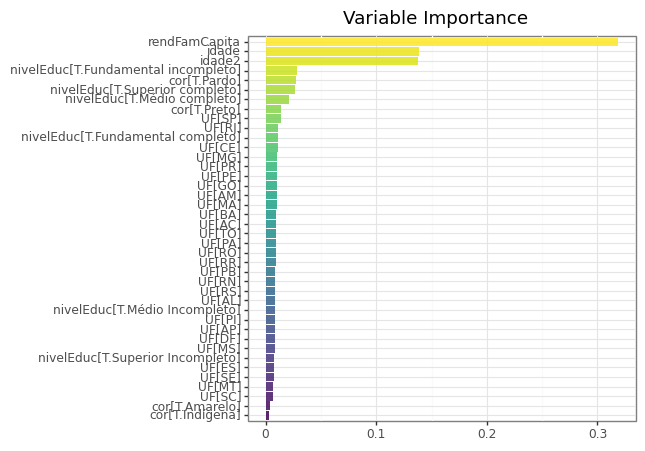

<ggplot: (8776051862269)>

In [143]:
(Var_imp >>
    mutate(variable = pd.Categorical(Var_imp["variable"], categories = Var_imp.sort_values("importance")["variable"].to_list(), ordered = True)) >>
    ggplot(aes(x = "variable", y = "importance", fill = "variable")) +
    geom_col(alpha = 0.85) +
    labs(x = "", y ="", title = "Variable Importance") +
    coord_flip() +
    theme(legend_position = "none"))